<h1>Creating A Neural Network to Analyze Police Homicide Rates</h1>

This lab creates a neural network, then tests it's accuracy using the violent crime rate and percent black population to predict police homicide rates.

In [156]:
%pylab inline
import numpy as np
import statistics
raw_data = open("police.csv")
allData = []
for i in raw_data:
    allData.append(i)
X = []
y = []
for data in allData:
    newRowX = []
    newRowY = []
    newRowX.append(float(data.split(",")[0]))
    newRowX.append(float(data.split(",")[1]))
    newRowY.append(float(data.split(",")[2]))
    X.append(newRowX)
    y.append(newRowY)

X = np.asarray(X)
y = np.asarray(y)

Populating the interactive namespace from numpy and matplotlib


In this part, I read data from the CSV and convert it into a dataset usable by my neural net.

In [196]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
    
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))


This code creates the Neural Network Class. To recieve predictions, data is inserted into the "forward" method. Here's a rundown of how the network operates:

1) The network is instantiated, and the hyperparameters are set. These values include the input layer, hidden layer, and output layer sizes. The input and output layer size have to do with the dimensionality of the data. In this case, our input data is 2 dimensional and the output is 1 dimensional, so we set the input size to 2 and output to 1. The hidden layer size determines the complexity (number of neurons) of the network. In this case, we are setting it to 3. These attributes cannot be changed after the network is created. 

The network works by multiplying the input data by a specific weight (Synapse), passing them to a neuron, which add together all the data from the synapses connected to them, then applies an activation function. In this case, we are using a sigmoid activation function. These results are then multiplied by a final set of weights, and run through a final activation function to yeild the final predictions. In order for the network to be accurate, it needs to be "trained," to figure out the right combination of weights. However, this comes later. For now, we the instantiation method will set random values for these weights.

2) Data is passed into the network through the "forward" method, as a numpy matrix array. In this method, 3 new matricies are created. Z2 is the result of matrix multiplication of the input data and the first set of weights. A2 is the result of applying the sigmoid function to the weighted values (Z2). These results are then multiplied by a second set of weights to yeild Z3. Finally, the results are run through a final sigmoid activation function to yeild the results, yHat, which is returned by the method.

We can now run our data through the neural network and see what it gives us. Turns out the predictions are not even close to correct. This is because our model has not been trained, and is simply using random weights.

In [200]:
NN = Neural_Network()
yHat = NN.forward(X)
print("Predictions:", yHat)
print("Actual:", y)

Predictions: [[ 0.74208231]
 [ 0.7495746 ]
 [ 0.74167959]
 [ 0.74356255]
 [ 0.73278299]
 [ 0.74518549]
 [ 0.74712734]
 [ 0.74634149]
 [ 0.733158  ]
 [ 0.7361778 ]
 [ 0.73297206]
 [ 0.73959816]
 [ 0.73196826]
 [ 0.75085877]
 [ 0.73977564]
 [ 0.7422901 ]
 [ 0.73643935]
 [ 0.75017899]
 [ 0.73570546]
 [ 0.73160064]
 [ 0.74681688]
 [ 0.74103738]
 [ 0.74469267]
 [ 0.74012374]
 [ 0.74397889]
 [ 0.73196821]
 [ 0.737785  ]
 [ 0.74855783]
 [ 0.74632679]
 [ 0.74250795]
 [ 0.75200135]
 [ 0.74634627]
 [ 0.74720936]
 [ 0.74779805]
 [ 0.7407023 ]
 [ 0.75102411]
 [ 0.74937308]
 [ 0.74391437]
 [ 0.73615467]
 [ 0.73234257]
 [ 0.75332134]
 [ 0.7484323 ]
 [ 0.73911331]
 [ 0.74188182]
 [ 0.73211883]
 [ 0.74926495]
 [ 0.74252635]
 [ 0.74639969]
 [ 0.74897346]
 [ 0.74463582]
 [ 0.74556816]
 [ 0.74133414]
 [ 0.74093234]
 [ 0.74807347]
 [ 0.72911915]
 [ 0.74752336]
 [ 0.73645939]
 [ 0.72900881]
 [ 0.7367217 ]
 [ 0.73387024]
 [ 0.73628478]
 [ 0.74118179]
 [ 0.7340653 ]
 [ 0.74016433]
 [ 0.73953601]
 [ 0.7267968

3) To train the network, we need to minimize the error. We do this by minimizing a "cost" function, which is just the sum of all terms of 0.5(y-yhat)^2. This can be rewritten as J = ∑0.5(y - sigmoid(W2*(sigmoid(X*W1)))^2 where W1 and W2 are the first and second sets of weights. We could just try all the values of the weights to find the best combination, but that would take to long. Intead, we can use calculus. 

Z3 = W2*(sigmoid(X*W1)
Taking the derivative, we get the following
          y = const.  yhat = sigmoid(Z3)| use the chain rule
dj/dw(2) = (y-yhat)* dyhat/dz(3) * dz(3)/dw(2)                            
dj/dw(2) = -(y-yhat) * sigmoidprime(Z^3) * dz(3)/dw(2)

The slope of Z3 is just A2 (the result of applying the sigmoid function to the weighted values (Z2)).

dj/dw2 = -(y-yhat) * sigmoidprime(Z^3) * a2
Thanks to the matrix multiplication of A2 and the rest of the equation, everything is added up so we don't need to worry abou the summation.

Now we can add on the part about w1

dj/dw1 = -(y-yhat) * sigmoidprime(Z^3) * dz(3)/da(2) * da(2)/dw(1)
dj/dw1 = -(y-yhat) * sigmoidprime(Z^3) * W(2) * sigmoidprime(z2) * dz(2)/dw(1)
dj/dw1 = -(y-yhat) * sigmoidprime(Z^3) * W(2) * sigmoidprime(z2) * X

The code to do all this is in the following methods of the Neural Network class: sigmoid, sigmoidPrime, costFunction, costFunctionPrime, and computeGradients.

While the details of the calculus can be confusing (I still do not understand all the steps), at a high level this is essentially figuring out the general direction of the cost function as the weights change. This allows us to figure out how the weights need to be changed in order for the cost to be reduced.

In [197]:
def computeNumericalGradient(N, X, y):
        paramsInitial = N.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            N.setParams(paramsInitial + perturb)
            loss2 = N.costFunction(X, y)
            
            N.setParams(paramsInitial - perturb)
            loss1 = N.costFunction(X, y)

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        N.setParams(paramsInitial)

        return numgrad 

In [174]:
numgrad = computeNumericalGradient(NN, X, y)
numgrad

grad = NN.computeGradients(X,y)
grad

norm(grad-numgrad)/norm(grad+numgrad)

4.0350007225398199e-11

4) We need a way to verify that our equations are correct, otherwise we have no way of knowing whether the network is working correctly.

We can do this by comparing the calculated derivative with a numerically calculated derivative (f'(x) = lim ∆x -> 0   (f(x + ∆x)-f(x))/∆x

The computeNumericalGradient calculates the derivative numerically. Above, we compare the analytically calculated derivatives to the numerical ones, by dividing the norm of the difference by the norm of the sum.

We would like the results to be equal to or less than 10^-8. In this case, the value is 4.0350007225398199e-11, so we are good.

In [175]:
from scipy import optimize

In [201]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res
    


5) Now we can train the network by utilizing the derivative of the cost function to determine how to adjust our weights.

To do this, we will used an algorithm called BFGS, which determines the magnitude of the movements that should be made using the second derivative, which is built into the SciPy "optimize" package.

The preceeding code uses this algorithm to train the network. We can now test out our trained network.

In [202]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)

         Current function value: 0.639169
         Iterations: 200
         Function evaluations: 285
         Gradient evaluations: 282


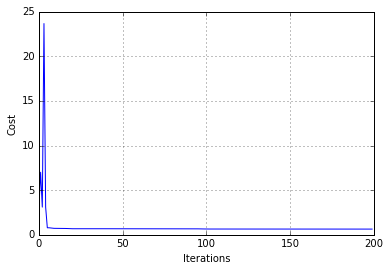

In [203]:
plot(T.J)
grid(1)
xlabel('Iterations')
ylabel('Cost')

The plot above shows how the cost function/error changes with each run through of the BFGS algorithm. As we can see, however, the error is still far from zero. Our input data is the violent crime rate and percent of total population that is black in 100 cities. The output data is the police homicide rate for that city. Since even after 200 iterations, the algorithm was unable to reduce the cost to nearly 0, there is likely very little correlation between the violent crime rate and black population - in other words, the output has little to do with the input and is almost seemingly random. Our model will probably not be extremely accurate.

Before we try our model, we need to make sure the model is not overfitting. This happens when the model essentially memorizes the dataset instead of modeling the general trend of the dataset.

In order to prevent overfitting, the following can be done:
1. Have at least 10x as many data as the degrees of freedom in the model. In this case, we have 9 weights, so we need 90 observations. We have 100, so overfitting should not be a problem.

2. Use Regularization, which penalizes overly complex models.

Now we can test our model.

Optimization terminated successfully.
         Current function value: 0.646115
         Iterations: 195
         Function evaluations: 226
         Gradient evaluations: 222


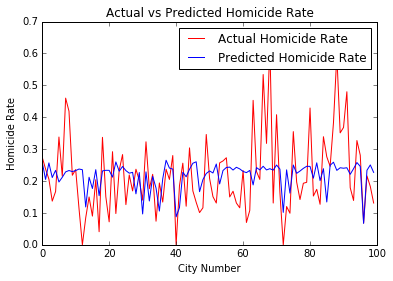

In [217]:
NN = Neural_Network()
T = trainer(NN)
T.train(X,y)
yHat = NN.forward(X)

dumbArray = []
i = 0
while (i < 100):
    dumbArray.append(i)
    i += 1
plt.plot(dumbArray, y,'r',label="Actual Homicide Rate")
plt.plot(dumbArray, yHat.tolist(),label="Predicted Homicide Rate")
plt.legend()
plt.title("Actual vs Predicted Homicide Rate")
plt.ylabel("Homicide Rate")
plt.xlabel("City Number")

As visible in the graph, the model gives fairly inaccurate predictions for each city. There are likely too many other variables for the model to be accurate.